### Promises from status update 10/26...

Additionally, we've started working on 
- methods of cleaning, transforming, and visualizing our data 
- exploratory analysis (via, e.g. word clouds, plots of various statistics, etc.) 

#### numeric figures:
- histogram of medDuration
- histogram of satisfaction, genRating, satisfaction/genRating
- scatter of medDuration v. rating [x = meddur, y = counts, 
- bar chart of other drugs mentioned in review?
- word cloud
- bar chart of condition specs
- scatter of rating v. upvotes @check

In [103]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [251]:
abilify = pickle.load( open( "abilify.p", "rb" ) )
reviews = abilify

In [252]:
for review in reviews:
    # fix ageRange to interval
    try:
        temp_ar = review['ageRange'].split('-')
        review['ageRange'] = [int(temp_ar[0]), int(temp_ar[1])]
    except:
        if type(review['ageRange']) != type([]):
            print(review['ageRange'])
            
    # fix medDuration to interval of months **[, ) interval
    try:
        temp_md = review['medDuration'].split('less than ') # "less than 1 month", :"x to less than y years"
        temp_md2 = temp_md[-1].split(' ')
        if temp_md2[-1]== 'years': # x to less than y years
            beg_num = int(temp_md[0].split(' ')[0])*12
            end_num = int(temp_md2[0]) *12
        elif temp_md2[-1] == 'month': # less than 1 month
            beg_num = 0
            end_num = 1
        elif temp_md2[-1] == 'months': # x to y months
            temp_md = review['medDuration'].split(' to ')
            beg_num = int(temp_md[0])
            end_num = int(temp_md[1].split(' ')[0])
        review['medDuration_int'] = [beg_num, end_num]
        review['medDuration'] = str([beg_num, end_num])
    except:
        if type(review['medDuration']) != type([]):
            print('wait, what?', review['medDuration'])
        
    for value in ['effectiveness', 'ease_of_use', 'satisfaction', 'genRating','upVotes']:
        try:
            review[value] = int(review[value])
        except:
            continue        

None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
wait, what? None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
wait, what? None
None
wait, what? None
None
wait, what? None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
wait, what? None
None
None
None
None
None
wait, what? None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
None
None
None
None
None
None
None
None
None
wait, what? None
None
None
wait, what? None
None
None
None
None
None
None

In [254]:
reviews_df = pd.DataFrame(reviews)

In [255]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

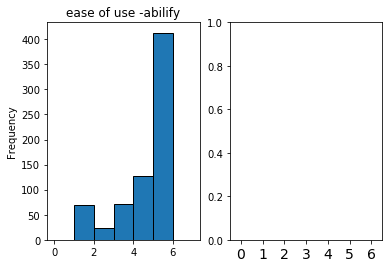

In [310]:

fig, ((ax1, ax2)) = plt.subplots(1,2)
bins = range(8)
bins_labels(bins, fontsize=14)
reviews_df['ease_of_use'].plot.hist(bins = bins, edgecolor="k", ax = ax1)
ax1.set_title('ease of use -abilify')

# reviews_df['ease_of_use'].plot.box()

In [ ]:
reviews_df[['ease_of_use', 'upVotes']]

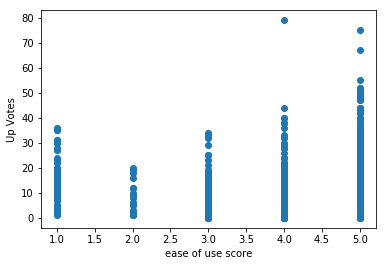

In [257]:
plt.scatter(reviews_df.ease_of_use, reviews_df.upVotes)
plt.xlabel('ease of use score')
plt.ylabel('Up Votes')

In [258]:
meddur = reviews_df.groupby(by = ['medDuration'])
meddur.groups.keys()

dict_keys(['[0, 1]', '[1, 6]', '[12, 24]', '[24, 60]', '[60, 120]'])

In [286]:
conversion_to = {key:ik for ik, key in enumerate(meddur.groups.keys())}
conversion_back = {ik:key for ik, key in enumerate(meddur.groups.keys())}

medDuration
[0, 1]       Axes(0.125,0.125;0.775x0.755)
[1, 6]       Axes(0.125,0.125;0.775x0.755)
[12, 24]     Axes(0.125,0.125;0.775x0.755)
[24, 60]     Axes(0.125,0.125;0.775x0.755)
[60, 120]    Axes(0.125,0.125;0.775x0.755)
Name: ease_of_use, dtype: object

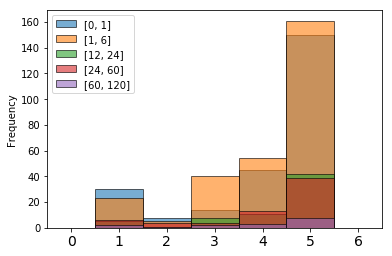

In [264]:
# reviews_df.groupby('medDuration').ease_of_use.hist(stacked = False)

def hist(x):
    h, e = np.histogram(x.dropna(), range=(0, 10))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
bins = range(8)
bins_labels(bins, fontsize=14)
reviews_df.groupby('medDuration').ease_of_use.plot.hist(stacked = False, alpha = .6, bins = bins, edgecolor="k", legend = True)#(**kw)



# reviews_df['ease_of_use'].plot.hist(bins = bins, edgecolor="k", ax = ax1)
# ax1.set_title('ease of use -abilify')

In [307]:
def make_hist(tag):
    kw = dict(stacked=True, width=1, rot=45)
    bins = range(8)
    bins_labels(bins, fontsize=14)

#     tag = 'ease_of_use'
    plt.hist(reviews_df[reviews_df["medDuration"]=='[0, 1]'][tag].reset_index(drop=True), alpha=0.6, label='[0, 1]', bins = bins, edgecolor="k")
    plt.hist(reviews_df[reviews_df["medDuration"]=='[1, 6]'][tag].reset_index(drop=True), alpha=0.6, label="[1, 6]", bins = bins, edgecolor="k", width=.35)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[12, 24]'][tag].reset_index(drop=True), alpha=0.6, label="[12, 24]", bins = bins, edgecolor="k", width =.45)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[24, 60]'][tag].reset_index(drop=True), alpha=0.6, label="[24, 60]", bins = bins, edgecolor="k", width=.25)
    plt.hist(reviews_df[reviews_df["medDuration"]=='[60, 120]'][tag].reset_index(drop=True), alpha=0.6, label="[60, 120]", bins = bins, edgecolor="k", width=.85)


    plt.legend(loc = 'best')
    # plt.axes = [[0,1],[0,10]]
    plt.axis([0.5, 6.5, 0, 170])
    plt.xlabel(tag+' rating')
    plt.ylabel('count')
    

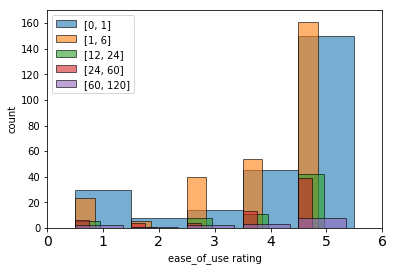

In [308]:
make_hist('ease_of_use')

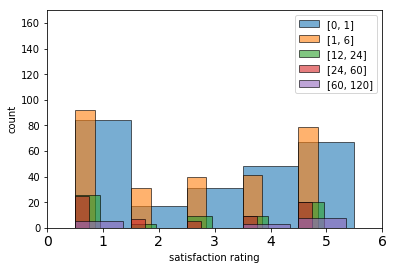

In [309]:
make_hist('satisfaction')

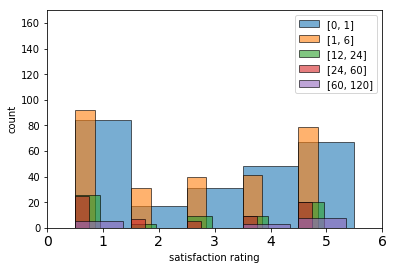

In [309]:
make_hist('effectiveness')

In [300]:
grouped =reviews_df.groupby(['medDuration', 'satisfaction'])
grouped.describe()

ease_of_use                                           \
                               count      mean       std  min   25%  50%  75%   
medDuration satisfaction                                                        
[0, 1]      1                   84.0  3.178571  1.736641  1.0  1.00  4.0  5.0   
            2                   17.0  3.647059  1.497547  1.0  2.00  4.0  5.0   
            3                   31.0  4.548387  0.623897  3.0  4.00  5.0  5.0   
            4                   48.0  4.520833  0.618495  3.0  4.00  5.0  5.0   
            5                   67.0  4.940299  0.384574  2.0  5.00  5.0  5.0   
[1, 6]      1                   92.0  3.293478  1.522996  1.0  2.00  3.0  5.0   
            2                   31.0  3.709677  1.101319  1.0  3.00  4.0  5.0   
            3                   40.0  4.350000  0.769615  3.0  4.00  5.0  5.0   
            4                   41.0  4.682927  0.521489  3.0  4.00  5.0  5.0   
            5                   79.0  4.936709  0.245042  4.0  5.00  5.0  5.0   
[12, 24]    1                   26.0  3.615385  1.551178  1.0  3.00  4.0  5.0   
            2                    3.0  4.000000  1.000000  3.0  3.50  4.0  4.5   
            3                    9.0  4.888889  0.333333  4.0  5.00  5.0  5.0   
            4                    9.0  4.333333  0.707107  3.0  4.00  4.0  5.0   
            5                   20.0  4.800000  0.615587  3.0  5.00  5.0  5.0   
[24, 60]    1                   25.0  3.400000  1.581139  1.0  2.00  4.0  5.0   
            2                    7.0  3.857143  1.069045  2.0  3.50  4.0  4.5   
            3                    5.0  4.800000  0.447214  4.0  5.00  5.0  5.0   
            4                    9.0  4.444444  1.013794  2.0  4.00  5.0  5.0   
            5                   20.0  4.850000  0.670820  2.0  5.00  5.0  5.0   
[60, 120]   1                    5.0  2.400000  1.341641  1.0  1.00  3.0  3.0   
            4                    3.0  4.666667  0.577350  4.0  4.50  5.0  5.0   
            5                    8.0  4.500000  1.069045  2.0  4.75  5.0  5.0   

                              effectiveness            ...              \
                          max         count      mean  ...    75%  max   
medDuration satisfaction                               ...               
[0, 1]      1             5.0          84.0  1.595238  ...   2.00  5.0   
            2             5.0          17.0  2.764706  ...   3.00  5.0   
            3             5.0          31.0  3.032258  ...   3.50  5.0   
            4             5.0          48.0  4.208333  ...   5.00  5.0   
            5             5.0          67.0  4.925373  ...   5.00  5.0   
[1, 6]      1             5.0          92.0  1.804348  ...   2.00  5.0   
            2             5.0          31.0  3.000000  ...   4.00  5.0   
            3             5.0          40.0  3.625000  ...   4.00  5.0   
            4             5.0          41.0  4.219512  ...   5.00  5.0   
            5             5.0          79.0  4.936709  ...   5.00  5.0   
[12, 24]    1             5.0          26.0  3.038462  ...   4.75  5.0   
            2             5.0           3.0  2.666667  ...   3.00  4.0   
            3             5.0           9.0  4.222222  ...   5.00  5.0   
            4             5.0           9.0  4.000000  ...   4.00  5.0   
            5             5.0          20.0  4.750000  ...   5.00  5.0   
[24, 60]    1             5.0          25.0  2.240000  ...   3.00  5.0   
            2             5.0           7.0  2.857143  ...   3.50  4.0   
            3             5.0           5.0  4.400000  ...   5.00  5.0   
            4             5.0           9.0  4.444444  ...   5.00  5.0   
            5             5.0          20.0  4.850000  ...   5.00  5.0   
[60, 120]   1             4.0           5.0  2.600000  ...   3.00  5.0   
            4             5.0           3.0  5.000000  ...   5.00  5.0   
            5             5.0           8.0  4.875000  ...   5.00  5

In [290]:
coded_meddur = []
satisfaction = []
for ik in range(len(reviews_df['medDuration'])):
    try:
        coded_meddur.append(conversion_to[reviews_df['medDuration'].iloc[ik]])
        satisfaction.append(reviews_df['satisfaction'].iloc[ik])
    except: 
        continue

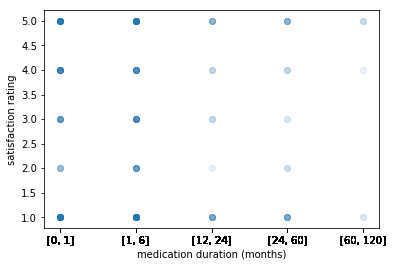

In [294]:
plt.scatter(coded_meddur,satisfaction, alpha = .03 )
plt.xticks(coded_meddur, [conversion_back[tick] for tick in coded_meddur])
plt.xlabel('medication duration (months)')
plt.ylabel('satisfaction rating')